[![バナー画像](http://ai999.careers/bnr_jdla.png)](http://study-ai.com/jdla/)

URL: <http://study-ai.com/jdla/>

# <b>深層学習: Day3

### <b>確認テスト1

#### <b>【問題】

サイズ5×5の入力画像を、サイズ3×3のフィルタで畳み込んだ時の出力画像のサイズを答えよ。なおストライドは2、パディングは1とする。

#### <b>【解答】

3×3

#### <b>「確認テスト1」について自身の考察結果

* <b>公式
 * （出力画像の高さ）＝{（入力画像の高さ）＋2×（パディング）－（フィルタの高さ）}／ストライド + 1
   * h = (5 + 2 * 1 - 3) / 2  + 1 = 4/2 + 1 = 3
 * （出力画像の幅）＝{（入力画像の幅）＋2×（パディング）－（フィルタの幅）}／ストライド + 1
   * w = (5 + 2 * 1 - 3) / 2  + 1 = 4/2 + 1 = 3

動画内でも一度誤っていたように、入力画像サイズとフィルタサイズを混同しないように注意が必要。

## <b>Section1: 再帰型ニューラルネットワークの概念

<b>要点まとめ

<b>時系列データを用いてニューラルネットワークで予測をする場合、CNNと同様時系列データを縦一列のベクトルとして入力することは可能であるが、本来時系列データが有している「時系列」の情報が反映されなくなってしまう。より適切に時系列データを用いた予測を行うためには、データを時間軸に沿って入力し時間情報を反映できるようにすべきであり、そのために考案されたのがリカレントニューラルネットワーク（RNN）である。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p167

### <b>1-1 RNN全体像

#### <b>1-1-1 RNNとは

* RNN(Recurrent Neural Network)
  * 時系列データに対応可能なニューラルネットワーク

#### <b>1-1-2 時系列データ

* 時系列データ
 * 時間的順序を追って一定間隔ごとに観察され、しかも相互に統計的依存関係が認められるようなデータの系列
   * 音声データ
   * テキストデータ
   * etc..

#### <b>1-1-3 RNNについて

* 数式
$$
u^{t} = W_{(in)}x^{t} + Wz^{t-1} + b
$$
$$
z^{t} = f(W_{(in)}x^{t} + Wz^{t-1} + b)
$$
$$
v^{t} = W_{(out)}z^{t} + c
$$
$$
y^{t} = g(W_{(out)}z^{t} + x)
$$

* コード<br>
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)<br>
z[:,t+1] = functions.sigmoid(u[:,t+1])<br>
np.dot(z[:,t+1].reshape(1, -1), W_out)<br>
y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))

### <b>確認テスト2

#### <b>【問題】

RNNのネットワークには大きくわけて3つの重みがある。1つは入力から現在の中間層を定義する際にかけられる重み、1つは中間層から出力を定義する際にかけられる重みである。残り1つの重みについて説明せよ。

#### <b>【解答】

前の中間層から再び中間層へと入力されるデータにかけられる重み

#### <b>「確認テスト2」について自身の考察結果

<b>RNNは入力層→中間層→出力層という層構成は通常のニューラルネットワークと同一だが、時系列データを扱うために中間層で処理したデータを出力層に渡すだけではなく、さも入力データかのようにもう一度中間層に入力する。それにより、時刻歴という情報を取り扱えるようにしている。

* RNNの特徴
 * 時系列モデルを扱うには、初期の状態と過去の時間t-1の状態を保持し、そこから次の時間でのtを再帰的に求める再帰構造が必要になる。

### <b>演習チャレンジ1

#### <b>【問題】

以下は再帰型ニューラルネットワークにおいて構文木を入力として再帰的に文全体の表現ベクトルを得るプログラムである。ただし、ニューラルネットワークの重みパラメータはグローバル変数として定義してあるものとし、 _ activation 関数はなんらかの活性化関数であるとする。木構造は再帰的な辞書で定義してあり、rootが最も外側の辞書であると仮定する。（く）にあてはまるのはどれか。

In [1]:
# def traverse(node):
#     """
#     node: tree node, recursive dict, {left: node', right: node''}
#           if leaf, word embeded vector, (embed_size,)
#     
#     W: weight, global variable, (embed_size, 2*embed_size)
#     b: bias, global variable, (embed_size,)
#     """
#     if not isinstance(node, dict):
#         v = node
#     else:
#         left = traverse(node['left'])
#         right = traverse(node['right'])
#         v = _activation(   く   )
#     return v

#### <b>【解答】

In [2]:
def traverse(node):
    """
    node: tree node, recursive dict, {left: node', right: node''}
          if leaf, word embeded vector, (embed_size,)
   
    W: weight, global variable, (embed_size, 2*embed_size)
    b: bias, global variable, (embed_size,)
    """
    if not isinstance(node, dict):
        v = node
    else:
        left = traverse(node['left'])
        right = traverse(node['right'])
        v = _activation(W.dot(np.concatenate([left, right])))
    return v

W.dot(np.concatenate([left, right]))

隣接単語（表現ベクトル）から表現ベクトルを作るという処理は、隣接している表現leftとrightを合わせたものを特徴量としてそこに重みを掛けることで実現する。つまり、W.dot(np.concatenate([left, right]))である。


### <b>1-2 BPTT

#### <b>1-2-1 BPTTとは

* BPTT(Backpropagation Through Time)
 * RNNにおいてのパラメータ調整方法の一種（誤差逆伝播の一種）
 * RNNは重みが3つ（Win, Wout, W）あるので、誤差Eに対してそれぞれで微分する必要がある。

* <b>【参考文献】
    * [Backpropagation Through Time（BPTT）](https://book.mynavi.jp/manatee/detail/id=76172), 2020.12.20 アクセス

### <b>確認テスト3

#### <b>【問題】

連鎖律の原理を使い、dz/dxを求めよ。<br>
z = t^2<br>
t = x + y

#### <b>【解答】

dz/dt = 2t<br>
dt/dx = 1<br>
dz/dx = dz/dt・dt/dx = 2t * 1 = 2t = 2(x + y)

#### <b>「確認テスト3」について自身の考察結果

<b>連鎖率の基本的な問題。dz/dxを直接求めることはできないため、いったんdtを介するのがポイント。

#### <b>1-2-2 BPTTの数学的記述

* BPTTの数学的記述1

* 数式
$$
  \frac{\partial E}{\partial W_{(in)}} = \frac{\partial E}{\partial u^{t}} \Biggl[ \frac{\partial u^{t}}{\partial W_{(in)}} \Biggr] ^{T} = \delta^{t}[x^{t}]^{T}
$$
$$
  \frac{\partial E}{\partial W_{(out)}} = \frac{\partial E}{\partial v^{t}} \Biggl[ \frac{\partial v^{t}}{\partial W_{(out)}} \Biggr] ^{T} = \delta^{out, t}[z^{t}]^{T}
$$
$$
  \frac{\partial E}{\partial W} = \frac{\partial E}{\partial u^{t}} \Biggl[ \frac{\partial u^{t}}{\partial W} \Biggr] ^{T} = \delta^{t}[z^{t-1}]^{T}
$$
$$
  \frac{\partial E}{\partial b} = \frac{\partial E}{\partial u^{t}} \frac{\partial u^{t}}{\partial b} = \delta^{t}
$$
$$
  \frac{\partial E}{\partial c} = \frac{\partial E}{\partial v^{t}} \frac{\partial v^{t}}{\partial c} = \delta^{out, t}
$$

* コード<br>
np.dot(X.T, delta[:,t].reshape(1,-1))<br>
np.dot(z[:,t+1].reshape(-1,1), delta_out[:,t].reshape(-1,1))<br>
np.dot(z[:,t].reshape(-1,1), delta[:,t].reshape(1,-1))

* BPTTの数学的記述2

* 数式
$$
u^{t} = W_{(in)}x^{t} + Wz^{t-1} + b
$$
$$
z^{t} = f(W_{(in)}x^{t} + Wz^{t-1} + b)
$$
$$
v^{t} = W_{(out)}z^{t} + c
$$
$$
y^{t} = g(W_{(out)}z^{t} + c)
$$

* コード<br>
u[:,t+1] = np.dot(X, W_in) + np.dot(z[:,t].reshape(1, -1), W)<br>
z[:,t+1] = functions.sigmoid(u[:,t+1])<br>
np.dot(z[:,t+1].reshape(1, -1), W_out)<br>
y[:,t] = functions.sigmoid(np.dot(z[:,t+1].reshape(1, -1), W_out))

### <b>確認テスト4

#### <b>【問題】

下図のy1をx・z0・z1・win・w・woutを用いて数式で表せ。<br>
※バイアスは任意の文字で定義せよ。<br>
※また中間層の出力にシグモイド関数g(x)を作用させよ。

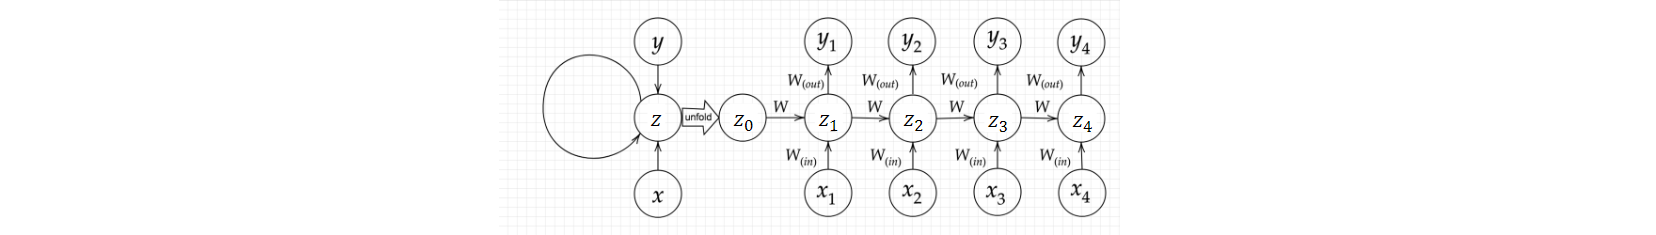

#### <b>【解答】

$$
y_{1} = g(W_{out} * z_{1}) = g{W_{out} * f(W_{in}x_{1} + Wz_{0} + b)}
$$

#### <b>「確認テスト4」について自身の考察結果

<b>動画内では中間層を表す記号が問題文ではzだったが解答ではsに変わっている。ここでは問題文での記号に従ってzを採用した。コードを書く際は変数を混同してしまわないように注意が必要である。また、y1を出力する際に掛けられる重みWoutとz2へ入力する際に掛けられる重みWは異なるものとなることにも注意が必要である。

#### <b>1-2-3 BPTTの全体像

### <b>演習チャレンジ2

#### <b>【問題】

以下はBPTTを行うプログラムである。なお簡単化のため活性化関数は恒等関数であるとする。また、calculate_dout関数は損失関数を出力に関して偏微分した値を返す関数であるとする。（お）にあてはまるのはなにか。

In [1]:
# def bptt(xs, ys, W, U, V):
#     hiddens, outputs = rnn_net(xs, W, U, V)
#     dW = np.zeros_like(W)
#     dU = np.zeros_like(U)
#     dV = np.zeros_like(V)
#     do = _calculate_do(outputs, ys)
#     batch_size, n_seq = ys.shape[:2]
#     
#     for t in reversed(range(n_seq)):
#         dV = np.dot(do[:, t].T, hiddens[:, t]) / batch_size
#         delta_t = do[:, t].dot(V)
#         
#         for bptt_step in reversed(range(t+1)):
#             dW += np.dot(delta_t.T, xs[:, bptt_step]) / batch_size
#             dU += np.dot(delta_t.T, hiddens[:, bptt_step-1]) / batch_size
#             delta_t = (   お   )
#     return dW, dU, dV

#### <b>【解答】

In [3]:
def bptt(xs, ys, W, U, V):
    hiddens, outputs = rnn_net(xs, W, U, V)
    dW = np.zeros_like(W)
    dU = np.zeros_like(U)
    dV = np.zeros_like(V)
    do = _calculate_do(outputs, ys)
    batch_size, n_seq = ys.shape[:2]
    
    for t in reversed(range(n_seq)):
        dV = np.dot(do[:, t].T, hiddens[:, t]) / batch_size
        delta_t = do[:, t].dot(V)
        
        for bptt_step in reversed(range(t+1)):
            dW += np.dot(delta_t.T, xs[:, bptt_step]) / batch_size
            dU += np.dot(delta_t.T, hiddens[:, bptt_step-1]) / batch_size
            delta_t = (delta_t.dot(U))
    return dW, dU, dV

delta_t.dot(U)

RNNでは中間層出力h_{t}が過去の中間層出力h_{t-1},.., h_{1}に依存する。<br>
RNNにおいて損失関数を重みWやUに関して偏微分するときは、それを考慮する必要があり、dh_{t}/dh_{t-1} = Uであることに注意すると、過去に遡るたびにUが掛けられる。<br>
したがって、delta_t= delta_t.dot(U)となる。

## <b>Section2: LSTM

<b>要点まとめ

<b>RNNが抱える問題の一つに、通常のニューラルネットワークにもある勾配消失問題がある。RNNは時間軸に沿って深いネットワークになる構造上、誤差を逆伝播する際過去にさかのぼるにつ入れて勾配が消えてしまうという問題が発生する。また、時系列データを扱う都合上、「今の時点では関係ないが、将来の時点では関係ある」入力を与えられた際に重みをどのようにすればよいか判断しかねる「入力重み衝突」や出力における「出力重み衝突」などの問題も発生する。これらを解決する手段として中間層の構造を変更するLSTMがある。LSTMでは、LSTMブロックと呼ばれる機構を導入して、時系列情報をうまくネットワーク内に保持することを可能にしている。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p169-170

* RNNの課題
 * 時系列を遡れば遡るほど勾配が消失していく（長い時系列の学習が困難）
<br><br>
* 解決策
 * LSTM(Long Short-Term Memory)を用いて解決する

### <b>確認テスト5

#### <b>【問題】

シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値はなにか。

#### <b>【解決】

0.25

#### <b>「確認テスト5」について自身の考察結果

<b>シグモイド関数f(x) = 1/(1+e^-x)を微分するとf'(x) = (1 - f(x))*f(x)で表される。x = 0のとき、シグモイド関数は最大値f(0) = 1/2をとるため、このときシグモイド関数の微分f'(x)はf'(0) = (1 - (1/2)) * (1/2) = 1/4 = 0.25をとる。

* 勾配爆発
 * 勾配が層を逆伝播するごとに指数関数的に大きくなっていくこと。

### <b>演習チャレンジ3

#### <b>【問題】

RNNや深いモデルでは勾配の消失または爆発が起こる傾向がある。勾配爆発を防ぐために勾配のクリッピングを行うという手法がある。具体的には勾配のノルムがしきい値を超えたら、勾配のノルムをしきい値に正規化するというものである。以下は勾配のクリッピングを行う関数である。（さ）にあてはまるのはどれか。

In [ ]:
# def gradient_clipping(grad, threshold):
#     """
#     grad: gradient
#     """
#     norm = np.linalg.norm(grad)
#     rate = threshold / norm
#     if rate < 1:
#         return (   さ   )
#     return grad

#### <b>【解答】

In [1]:
def gradient_clipping(grad, threshold):
    """
    grad: gradient
    """
    norm = np.linalg.norm(grad)
    rate = threshold / norm
    if rate < 1:
        return (gradient * rate)
    return grad

gradient * rate

勾配のノルムがしきい値より大きいときは、勾配のノルムをしきい値に正規化するので、クリッピングした勾配は、勾配×(しきい値/勾配のノルム)と計算される。つまり、gradient * rateである。

* LSTMブロック
 * 誤差を内部に留まらせるためのセル（CEC）
 * 必要な情報を必要なタイミングで保持・消却させるためのゲート
<br><br>
* CEC(Constant Error Carousel)
 * 誤差を内部に留め、勾配消失を防ぐためのもの。
* ゲート
 * 入力ゲート
 * 出力ゲート
 * 忘却ゲート

### <b>2-1 CEC

* CECの課題
 * 入力データについて、時間依存度に関係なく重みが一律である（ニューラルネットワークの学習特性が無い）。

### <b>2-2 入力ゲートと出力ゲート

* 入出力ゲートの役割
 * 入力・出力ゲートを追加することで、それぞれのゲートへの入力値の重みを、重み行列W,Uで可変可能とする（CECの課題を解決）。

### <b>2-3 忘却ゲート

* 忘却ゲートの役割
 * 誤差が過剰にセルに停留するのを防ぐリセットの役割を果たす。

### <b>確認テスト6

#### <b>【問題】

以下の文章をLSTMに入力し空欄に当てはまる単語を予測したいとする。文中の「とても」という言葉は空欄の予測においてなくなっても影響を及ぼさないと考えられる。このような場合、どのゲートが作用すると考えられるか。<br>
<br>
「映画おもしろかったね。ところで、とてもお腹が空いたから何か____ 。」

#### <b>【解答】

忘却ゲート

#### <b>「確認テスト6」について自身の考察結果

<b>「とても」はなくても意味が通じる（空欄を考えるための判断材料にならない）ため、忘却ゲートで消去してしまって問題ない。

### <b>演習チャレンジ4

#### <b>【問題】

以下のプログラムはLSTMの順伝播を行うプログラムである。ただし_sigmoid関数は要素ごとにシグモイド関数を作用させる関数である。（け）にあてはまるのはなにか。

In [2]:
# def lstm(x, prev_h, prev_c, W, U, b):
#     lstm_in = _activation(x.dot(W.T) + prev_h.dot(U.T) + b)
#     a, i, f, o = np.hsplit(lstm_in, 4)
#     
#     a = np.tanh(a)
#     input_gate = _sigmoid(i)
#     forget_gate = _sigmoid(f)
#     output_gate = _sigmoid(o)
#     
#     c = (   け   )
#     h = output_gate * np.tanh(c)
#     return c, h

#### <b>【解答】

In [3]:
def lstm(x, prev_h, prev_c, W, U, b):
    lstm_in = _activation(x.dot(W.T) + prev_h.dot(U.T) + b)
    a, i, f, o = np.hsplit(lstm_in, 4)
    
    a = np.tanh(a)
    input_gate = _sigmoid(i)
    forget_gate = _sigmoid(f)
    output_gate = _sigmoid(o)
    
    c = (input_gate* a + forget_gate * c)
    h = output_gate * np.tanh(c)
    return c, h

input_gate * a + forget_gate * c

新しいセルの状態は、計算されたセルへの入力と1ステップ前のセルの状態に入力ゲート、忘却ゲートを掛けて足し合わせたものと表現される。つまり、input_gate* a + forget_gate* cである。

### <b>2-4 覗き穴結合

* 覗き穴結合
 * CEC自身の値に、重み行列を介して伝播可能にした構造。

## <b>Section3: GRU

<b>要点まとめ

<b>LSTMは時系列データを扱う上でデファクトスタンダードのモデルになっていると言える。一方、LSTMはセルやゲートそれぞれを最適化しなくてはならないため、計算量を多く要する。そのため、LSTMを簡略化した手法がGRUであり、リセットゲート・更新ゲートが入力ゲート・出力ゲート・忘却ゲートの代わりを果たしている。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p171

* LSTMの課題
 * LSTMでは、パラメータ数が多く計算負荷が高くなる。
<br><br>
* GRU(Gated Recurrent Unit)
 * パラメータを大幅に削減し、精度はLSTMと同等またはそれ以上が望める様になった構造。

### <b>確認テスト7

#### <b>【問題】

LSTMとCECが抱える課題について、それぞれ簡潔に述べよ。

#### <b>【解答】

* LSTM
 * パラメータ数が多く計算負荷が高くなる。
* CEC
 * 勾配がない（学習能力がない）。

#### <b>「確認テスト7」について自身の考察結果

<b>LSTMは時系列データを扱う上でデファクトスタンダードのモデルになっていると言える。一方、LSTMはセルやゲートそれぞれを最適化しなくてはならないため、計算量を多く要する。

### <b>演習チャレンジ5

#### <b>【問題】

GRU(Gated Recurrent Unit)もLSTMと同様にRNNの一種であり、単純なRNNにおいて問題となる勾配消失問題を解決し、長期的な依存関係を学習することができる。LSTMに比べ変数の数やゲートの数が少なく、より単純なモデルであるが、タスクによってはLSTMより良い性能を発揮する。以下のプログラムはGRUの順伝播を行うプログラムである。ただし_sigmoid関数は要素ごとにシグモイド関数を作用させる関数である。（こ）にあてはまるのはどれか。

In [4]:
# def gru(x, h, W_r, U_r, W_z, U_z, W, U):
#     
#     r = _sigmoid(x.dot(W_r.T) + h.dot(U_r.T))
#     z = _sigmoid(x.dot(W_z.T) + h.dot(U_z.T))
#     
#     h_bar = np.tanh(x.dot(W.T) + (r * h).dot(U.T))
#     h_new = (   こ   )
#     return h_new

#### <b>【解答】

In [5]:
def gru(x, h, W_r, U_r, W_z, U_z, W, U):
    
    r = _sigmoid(x.dot(W_r.T) + h.dot(U_r.T))
    z = _sigmoid(x.dot(W_z.T) + h.dot(U_z.T))
    
    h_bar = np.tanh(x.dot(W.T) + (r * h).dot(U.T))
    h_new = (1-z) * h + z * h_bar
    return h_new

新しい中間状態は、1ステップ前の中間表現と計算された中間表現の線形和で表現される。つまり更新ゲートzを用いて、(1-z) * h + z * h_barと書ける。

### <b>確認テスト8

#### <b>【問題】

LSTMとGRUの違いを簡潔に述べよ。

#### <b>【解答】

LSTMは入力ゲート・出力ゲート・忘却ゲートがあるのに対し、GRUはリセットゲート・更新ゲートで構成されている。

#### <b>「確認テスト8」について自身の考察結果

<b>LSTMを簡略化した手法がGRUであり、リセットゲート・更新ゲートが入力ゲート・出力ゲート・忘却ゲートの代わりを果たしている。

## <b>Section4: 双方向RNN

<b>要点まとめ

<b>双方向リカレントニューラルネットワークは、過去の情報のみならず未来の情報も加味することで精度向上を図ったモデルのこと。通常のLSTMは過去から未来への位置方向でしか学習をすることができないが、LSTMを2つ組み合わせることで未来から過去方向も含めて学習できるように改良を図っている。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p171-172

* 双方向RNN
 * 過去の情報だけでなく、未来の情報を加味することで、精度を向上させるためのモデル

### <b>演習チャレンジ6

#### <b>【問題】

以下は双方向RNNの順伝播を行うプログラムである。順方向については、入力から中間層への重みW_f, 一ステップ前の中間層出力から中間層への重みをU_f、逆方向に関しては同様にパラメータW_b, U_bを持ち、両者の中間層表現を合わせた特徴から出力層への重みはVである。_ rnn 関数はRNNの順伝播を表し中間層の系列を返す関数であるとする。（か）にあてはまるのはなにか。

In [ ]:
# def bidirectional_rnn_net(xs, W_f, U_f, W_b, U_b, V):
#     xs_f = np.zeros_like(xs)
#     xs_b = np.zeros_like(xs)
#     for i, x in enumerate(xs):
#         xs_f[i] = x
#         xs_b[i] = x[::-1]
#     hs_f = _rnn(xs_f, W_f, U_f)
#     hs_b = _rnn(xs_b, W_b, U_b)
#     hs = [(   か   ) for h_f, h_b in zip(hs_f, hs_b)]
#     ys = hs.dot(V.T)
#     return ys

#### <b>【解答】

In [6]:
def bidirectional_rnn_net(xs, W_f, U_f, W_b, U_b, V):
    xs_f = np.zeros_like(xs)
    xs_b = np.zeros_like(xs)
    for i, x in enumerate(xs):
        xs_f[i] = x
        xs_b[i] = x[::-1]
    hs_f = _rnn(xs_f, W_f, U_f)
    hs_b = _rnn(xs_b, W_b, U_b)
    hs = [np.concatenate([h_f, h_b[::-1]], axis=1) for h_f, h_b in zip(hs_f, hs_b)]
    ys = hs.dot(V.T)
    return ys

np.concatenate([h_f, h_b[::-1]], axis=1)

双方向RNNでは、順方向と逆方向に伝播したときの中間層表現をあわせたものが特徴量となるので、np.concatenate([h_f, h_b[::-1]], axis=1)である。


## <b>Section5: Seq2Seq

<b>要点まとめ

<b>時系列データ処理では、出力がスカラーではなく、出力も入力と同様に時系列で予測したい場合が多々存在する。そのような問題のことをSeq2Seq(sequence-to-sequence)と言い、自然言語処理を中心に大きく研究されている分野の一つとなっている、土台となるアプローチは2つのLSTMを組み合わせるRNN Encoder-Decoderと呼ばれる手法になる。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p172

* Seq2Seq(sequence-to-sequence)
 * Encoder-Decoderモデルの一種。機械対話や、機械翻訳などに使用されている。

### <b>5-1 Encoder RNN

* Taking :文章を単語等のトークン毎に分割し、トークンごとのIDに分割する
* Embedding :IDから、そのトークンを表す分散表現ベクトルに変換。
* Encoder RNN:ベクトルを順番にRNNに入力していく。
<br><br>
* Encoder RNN処理手順
 * vec1をRNNに入力し、hidden stateを出力。このhiddenstateと次の入力vec2をまたRNNに入力してきたhidden stateを出力という流れを繰り返す。
 * 最後のvecを入れたときのhiddenstateをfinalstateとしてとっておく。このfinalstateがthoughtvectorと呼ばれ、入力した文の意味を表すベクトルとなる。

### <b>5-2 Decoder RNN

1. Decoder RNN: Encoder RNN のfinal state (thought vector) から、各token の生成確率を出力していきますfinal state をDecoder RNN のinitial state ととして設定し、Embedding を入力。
2. Sampling:生成確率にもとづいてtoken をランダムに洗濯。
3. Embedding:2で選ばれたtoken をEmbedding してDecoder RNN への次の入力とする。
4. Detokenize:1 -3 を繰り返し、2で得られたtoken を文字列に直す。

### <b>確認テスト9

#### <b>【問題】

下記の選択肢から、seq2seqについて説明しているものを選べ。<br>
（1）時刻に関して順方向と逆方向のRNNを構成し、それら2つの中間層表現を特徴量として利用するものである。<br>
（2）RNNを用いたEncoder-Decoderモデルの一種であり、機械翻訳などのモデルに使われる。<br>
（3）構文木などの木構造に対して、隣接単語から表現ベクトル（フレーズ）を作るという演算を再帰的に行い（重みは共通）、文全体の表現ベクトルを得るニューラルネットワークである。<br>
（4）RNNの一種であり、単純なRNNにおいて問題となる勾配消失問題をCECとゲートの概念を導入することで解決したものである。

#### <b>【解答】

(2)

#### <b>「確認テスト9」について自身の考察結果

<b>(1)は双方向RNN, (3)は構文木, (4)はLSTMの内容。

### <b>演習チャレンジ7

#### <b>【問題】

機械翻訳タスクにおいて、入力は複数の単語から成る文（文章）であり、それぞれの単語はone-hotベクトルで表現されている。Encoderにおいて、それらの単語は単語埋め込みにより特徴量に変換され、そこからRNNによって（一般にはLSTMを使うことが多い）時系列の情報をもつ特徴へとエンコードされる。以下は、入力である文（文章）を時系列の情報をもつ特徴量へとエンコードする関数である。ただし_activation関数はなんらかの活性化関数を表すとする。（き）にあてはまるのはなにか。

In [ ]:
# def encode(words, E, W, U, b):
#     
#     hidden_size = W.shape[0]
#     h = np.zeros(hidden_size)
#     for w in words:
#         e = (   き   )
#         h = _activation(W.dot(e) + U.dot(h) + b)
#     return h

#### <b>【解答】

In [7]:
def encode(words, E, W, U, b):
    
    hidden_size = W.shape[0]
    h = np.zeros(hidden_size)
    for w in words:
        e = E.dot(w)
        h = _activation(W.dot(e) + U.dot(h) + b)
    return h

単語wはone-hotベクトルであり、それを単語埋め込みにより別の特徴量に変換する。これは埋め込み行列Eを用いて、E.dot(w)と書ける。

### <b>5-3 HRED

* Seq2Seqの課題
 * 問に対して文脈も何もなく、ただ応答が行われ続ける。
<br><br>
* HRED
 * Seq2Seq+ Context RNN
 * Seq2seqでは、会話の文脈無視で、応答がなされたが、HREDでは、前の単語の流れに即して応答されるため、より人間らしい文章が生成される（過去の発話の履歴を加味した返答をできる。）。
<br><br>
* HREDの課題
 * HRED は確率的な多様性が字面にしかなく、会話の「流れ」のような多様性が無い（同じコンテキスト（発話リスト）を与えられても、答えの内容が毎回会話の流れとしては同じものしか出せない）。
 * HRED は短く情報量に乏しい答えをしがち。

### <b>5-4 VHRED

* VHRED
 * HREDに、VAEの潜在変数の概念を追加したもの（HREDの課題を、VAEの潜在変数の概念を追加することで解決した構造）。

### <b>確認テスト10

#### <b>【問題】

seq2seqとHRED、HREDとVHREDの違いを簡潔に述べよ。

#### <b>【解答】

* seq2seq
 * Encoder-Decoderモデルの一種。機械対話や、機械翻訳などに使用されている（一問一答に対応するネットワーク）。
* HRED
 * Seq2Seq+ Context RNN。文脈の意味をくみ取れるようにしたモデル。
* VHRED
 * HREDに、VAEの潜在変数の概念を追加したもの（HREDの課題を、VAEの潜在変数の概念を追加することで解決した構造）。

#### <b>「確認テスト10」について自身の考察結果

<b>HRED は確率的な多様性が字面にしかなく、会話の「流れ」のような多様性が無い（同じコンテキスト（発話リスト）を与えられても、答えの内容が毎回会話の流れとしては同じものしか出せない）。また、HRED は短く情報量に乏しい答えをしがち。

### <b>5-5 VAE

#### <b>5-5-1 オートエンコーダー

* オートエンコーダ
 * 教師なし学習の一つ。学習時の入力データは訓練データのみで教師データは利用しない。
 * 入出力層（可視層）と中間層（隠れ層）の2層からなるネットワーク。

#### <b>5-5-2 VAE

* VAE（変分オートエンコーダ）
 * 通常のオートエンコーダーの場合、何かしら潜在変数zにデータを押し込めているものの、その構造がどのような状態かわからない。
 * VAEは、データを潜在変数zの確率分布という構造に押し込めることを可能にする。

### <b>確認テスト11

#### <b>【問題】

VAEに関する下記の説明文中の空欄に当てはまる言葉を答えよ。
<br><br>
自己符号化器の潜在変数に____ を導入したもの。

#### <b>【解答】

確率分布

#### <b>「確認テスト11」について自身の考察結果

<b>VAEは入力を固定された表現に圧縮するのではなく、統計分布（すなわち、平均と分散）で表現するように学習するもの。入力データが何かしらの分布に基づいて生成されているものだとしたら、その分布を表現するように学習すればいいのではないかという考え方に基づいている。

## <b>Section6: Word2vec

<b>要点まとめ

<b>文章中の単語（word）は、記号の集まり（文字列）として表現することができる。word2vecとは、この記号をベクトルとして表現することにより、ベクトル間の距離や関係として単語の意味を表現しようとするモデル。このためword2vecはベクトル空間モデル（vector space models）や、単語の意味をベクトル空間の中に表現したと考えられるために単語埋め込みモデル（word embedding models）とも呼ばれる。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p198

* word2vec
 * 大規模データの分散表現の学習が、現実的な計算速度とメモリ量で実現可能にした。

## <b>Section7: AttentionMechanism

<b>要点まとめ

<b>RNNの応用によって、さまざまな時系列タスクで高い精度が出せるようになった。一方で、RNNは過去のどの時点がどれだけ影響を持っているかまでは直接的に求めていない（あくまでもそれまでの時点の状態がまとまって過去の隠れ層として反映されている）。そうした背景から、「時間の重み」をネットワークに組み込んだのがAttentionと呼ばれる機構である。過去の時点それぞれの重みを学習することで、時間の重みを考慮したモデルを実現する。

* <b>【参考文献】
    * ディープラーニングG検定公式テキスト, 日本ディープラーニング協会（2018）, p173

* seq2seq の問題は長い文章への対応が難しい。seq2seq では、2単語でも、100単語でも、固定次元ベクトルの中に入力しなければならない。
* 文章が長くなるほどそのシーケンスの内部表現の次元も大きくなっていく、仕組みが必要。
* Attention Mechanismは、「入力と出力のどの単語が関連しているのか」の関連度を学習する仕組み。

### <b>確認テスト12

#### <b>【問題】

RNNとword2vec、seq2seqとAttentionの違いを簡潔に述べよ。

#### <b>【解答】

* RNN
 * 時系列データを処理するのに適したニューラルネットワーク。
* word2vec
 * 文字列をベクトルとして表現することにより、ベクトル間の距離や関係として単語の意味を表現しようとするモデル（単語の分散表現ベクトルを得る手法）。
* seq2seq
 * Encoder-Decoderモデルの一種。機械対話や、機械翻訳などに使用されている（一つの時系列データから別の時系列データを得るネットワーク）。
* Attention
 * 「入力と出力のどの単語が関連しているのか」の関連度を学習する仕組み（時系列データの中身に対して関連性に重みをつける手法）。

#### <b>「確認テスト12」について自身の考察結果

<b>RNNの応用によって、さまざまな時系列タスクで高い精度が出せるようになった。一方で、RNNは過去のどの時点がどれだけ影響を持っているかまでは直接的に求めていない（あくまでもそれまでの時点の状態がまとまって過去の隠れ層として反映されている）。そうした背景から、「時間の重み」をネットワークに組み込んだのがAttentionと呼ばれる機構である。過去の時点それぞれの重みを学習することで、時間の重みを考慮したモデルを実現する。